In [80]:
import pandas as pd
import numpy as np
import requests
import json
from scipy import stats
from citipy import citipy
import random
from config import api_key
import time
import matplotlib.pyplot as plt

In [4]:
#how does citipy work
#https://github.com/wingchen/citipy#looking-up-with-coordinates
city = citipy.nearest_city(41.8, -87.6)
city

In [5]:
city.city_name

'chicago'

In [6]:
city.country_code

'us'

In [7]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
lat_lngs = []
cities = []

In [19]:
#capping lattitudes at 80 because no one lives up there:

lats = np.random.uniform(-80, 80, size = 1300)
longs = np.random.uniform(-180, 180, size = 1300)

In [20]:
lat_longs=pd.DataFrame({"latitude":lats,
                       "longitude":longs})

In [21]:
lat_longs

,latitude,longitude
0,23.821714,39.245086
1,-28.868803,-134.911953
2,51.138842,-64.434241
3,-49.690197,-105.623578
4,25.674202,105.188541
...,...,...
1195,60.775983,-147.149401
1196,23.526999,-23.238174
1197,-56.208654,-83.588958
1198,-16.811223,70.060189


In [28]:
cities = []

for index, row in lat_longs.iterrows():
    city = citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    
    if city not in cities:
        cities.append(city)



In [29]:
len(cities)

574

In [48]:
weather=pd.DataFrame({"city":cities})

weather.head()

,city
0,jiddah
1,rikitea
2,havre-saint-pierre
3,castro
4,xingyi


In [49]:
weather["latitude"] = ""
weather["longitude"] = ""
weather["temperature"] = ""
weather["humidity"] = ""
weather["cloudiness"] = ""
weather["wind"] = ""

weather.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind
0,jiddah,,,,,,
1,rikitea,,,,,,
2,havre-saint-pierre,,,,,,
3,castro,,,,,,
4,xingyi,,,,,,


In [126]:
# what inputs does open weather need
# https://openweathermap.org/current
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [ ]:
#api call from open weather to get some weather

In [3]:
test = "husavik"

In [13]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={test}&appid={api_key}&units=imperial").json()

In [14]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 66.0449,
        "lon": -17.3389
    },
    "dt": 1611690277,
    "id": 2629833,
    "main": {
        "feels_like": 14.56,
        "humidity": 80,
        "pressure": 1023,
        "temp": 23,
        "temp_max": 23,
        "temp_min": 23
    },
    "name": "Husavik",
    "snow": {
        "1h": 0.12
    },
    "sys": {
        "country": "IS",
        "id": 83,
        "sunrise": 1611656798,
        "sunset": 1611677818,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 5.75
    }
}


In [10]:
#latitude
response["coord"]["lat"]

66.0449

In [11]:
#longitude
response["coord"]["lon"]

-17.3389

In [15]:
#temp
response["main"]["temp"]

23

In [18]:
#humidity
response["main"]["humidity"]

80

In [17]:
#cloudiness
response["clouds"]["all"]

75

In [16]:
#wind
response["wind"]["speed"]

5.75

In [37]:
test = pd.DataFrame({"city":["Chicago", "Lima", "Cape Town"],
                    "latitude":"",
                     "longitude":"",
                     "temperature":"",
                     "humidity":"",
                     "cloudiness":"",
                     "wind":""})
test.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind
0,Chicago,,,,,,
1,Lima,,,,,,
2,Cape Town,,,,,,


In [61]:
for index, row in weather.iterrows():
    city = row["city"]
    
    not_json_yet = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial")
    
    if not_json_yet.status_code == 200:
        
        response = not_json_yet.json()
    
        weather.loc[index, "latitude"] = response["coord"]["lat"]
        weather.loc[index, "longitude"] = response["coord"]["lon"]
        weather.loc[index, "temperature"] = response["main"]["temp"]
        weather.loc[index, "humidity"] = response["main"]["humidity"]
        weather.loc[index, "cloudiness"] = response["clouds"]["all"]
        weather.loc[index, "wind"] = response["wind"]["speed"]
    
        print(f"Pulling weather for city #{index}, {city}")
    
        time.sleep(1)
        #to prevent maxing out the api call
    
    else: 
        print(f"no data for city #{index}, {city}")

no data for city #0, jiddah
Pulling weather for city #1, rikitea
Pulling weather for city #2, havre-saint-pierre
Pulling weather for city #3, castro
Pulling weather for city #4, xingyi
Pulling weather for city #5, ushuaia
no data for city #6, karauzyak
Pulling weather for city #7, norman wells
Pulling weather for city #8, hilo
Pulling weather for city #9, umm kaddadah
Pulling weather for city #10, mago
Pulling weather for city #11, port alfred
Pulling weather for city #12, aykhal
no data for city #13, saleaula
Pulling weather for city #14, grindavik
Pulling weather for city #15, severnyy
Pulling weather for city #16, deputatskiy
Pulling weather for city #17, butaritari
Pulling weather for city #18, fairbanks
Pulling weather for city #19, pec
Pulling weather for city #20, fortuna foothills
no data for city #21, umm durman
Pulling weather for city #22, alyangula
Pulling weather for city #23, balabac
Pulling weather for city #24, atuona
Pulling weather for city #25, mataura
Pulling weathe

Pulling weather for city #210, port arthur
Pulling weather for city #211, pisco
Pulling weather for city #212, san pedro
Pulling weather for city #213, gaoual
Pulling weather for city #214, obo
Pulling weather for city #215, maniitsoq
Pulling weather for city #216, ancud
Pulling weather for city #217, valley city
Pulling weather for city #218, la ronge
Pulling weather for city #219, new norfolk
Pulling weather for city #220, villarrobledo
Pulling weather for city #221, qaanaaq
Pulling weather for city #222, honiara
Pulling weather for city #223, novoagansk
Pulling weather for city #224, bubaque
Pulling weather for city #225, barretos
Pulling weather for city #226, lander
Pulling weather for city #227, port elizabeth
Pulling weather for city #228, mizque
Pulling weather for city #229, lorengau
Pulling weather for city #230, lata
Pulling weather for city #231, chunskiy
Pulling weather for city #232, kahului
Pulling weather for city #233, pevek
Pulling weather for city #234, nanyang
Pulli

Pulling weather for city #417, allapalli
Pulling weather for city #418, ketchikan
Pulling weather for city #419, uetze
Pulling weather for city #420, fort nelson
Pulling weather for city #421, sao miguel do araguaia
Pulling weather for city #422, touros
Pulling weather for city #423, chapleau
Pulling weather for city #424, belaya gora
Pulling weather for city #425, rafraf
Pulling weather for city #426, padang
Pulling weather for city #427, iguaba grande
Pulling weather for city #428, biltine
no data for city #429, paradwip
Pulling weather for city #430, margate
Pulling weather for city #431, bastia
Pulling weather for city #432, southbridge
Pulling weather for city #433, saint-jovite
Pulling weather for city #434, mandalgovi
Pulling weather for city #435, udayagiri
Pulling weather for city #436, constitucion
Pulling weather for city #437, lashio
no data for city #438, eldikan
Pulling weather for city #439, grand gaube
Pulling weather for city #440, kieta
no data for city #441, palabuha

In [62]:
weather.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind
0,jiddah,,,,,,
1,rikitea,-23.1203,-134.969,80.15,69,33,11.86
2,havre-saint-pierre,50.2334,-63.5986,32,64,75,8.05
3,castro,-24.7911,-50.0119,70.88,90,100,4.97
4,xingyi,24.1877,102.817,45.57,94,0,4.18


In [73]:
weather.drop(weather.loc[weather["latitude"] == "",:].index, inplace=True)
#borrowed from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

In [74]:
weather

,city,latitude,longitude,temperature,humidity,cloudiness,wind
1,rikitea,-23.1203,-134.969,80.15,69,33,11.86
2,havre-saint-pierre,50.2334,-63.5986,32,64,75,8.05
3,castro,-24.7911,-50.0119,70.88,90,100,4.97
4,xingyi,24.1877,102.817,45.57,94,0,4.18
5,ushuaia,-54.8,-68.3,42.8,70,90,28.77
...,...,...,...,...,...,...,...
569,cobija,-11.0267,-68.7692,79.65,80,100,2.39
570,nizhniy kuranakh,58.8353,125.487,-35.18,80,100,1.57
571,ekhabi,53.5102,142.967,-1.61,93,100,8.41
572,lompoc,34.6391,-120.458,51.4,47,1,12.66


In [76]:
weather.to_csv("results/weather_data.csv", index=False)

Text(0.5, 0, 'Latitude')

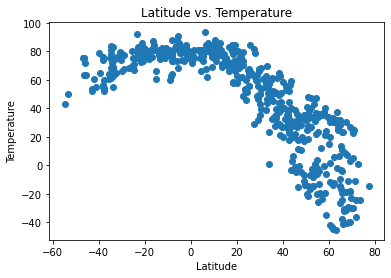

In [81]:
plt.scatter(weather["latitude"], weather["temperature"])
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

In [ ]:
# data note: my cities list doesn't have any latitudes below -60, but that's because there aren't any cities below that latitude! https://en.wikipedia.org/wiki/Southernmost_settlements

In [ ]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how hot it was there at the time the data was pulled. There is no data below a latitude of -60 (60 degrees south) because there are no cities that far south. The graph isn't symmetrical because it's winter in the northern hemisphere and summer in the southern hemisphere.

Text(0.5, 0, 'Latitude')

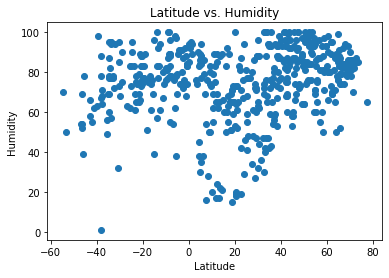

In [82]:
plt.scatter(weather["latitude"], weather["humidity"])
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

In [95]:
weather.loc[weather["humidity"]<25,:]

,city,latitude,longitude,temperature,humidity,cloudiness,wind,hemisphere
9,umm kaddadah,13.6017,26.6876,68.74,22,12,11.61,
32,araouane,18.9048,-3.5265,72.81,15,0,10.36,
145,atar,20.5169,-13.0499,71.46,19,0,7.23,
160,massakory,12.996,15.7293,77.18,17,91,12.66,
174,taoudenni,22.6783,-3.9836,73.26,19,0,12.57,
188,lakes entrance,-37.8811,147.981,55,1,4,3,
213,gaoual,11.75,-13.2,77.52,17,2,1.68,
315,marabba,12.35,32.1833,78.28,24,17,12.44,
428,biltine,14.5333,20.9167,70.74,21,88,5.75,
471,adrar,20.5022,-10.0711,69.19,18,0,8.08,


In [ ]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how humid it was there at the time the data was pulled. We can see a group of cities around latitudes 0-25 that are particularly dry, and looking more closely at the data we can see that these are almost all in the sahara desert.

Text(0.5, 0, 'Latitude')

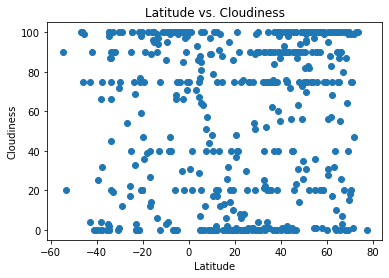

In [89]:
plt.scatter(weather["latitude"], weather["cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

In [ ]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows how cloudy it was there at the time the data was pulled. At a glance it looks like clouds are pretty evenly distributed. The horizontal bands probably mean that the data isn't precise down to the integer - whoever takes the data probably just estimates 0%, 20%, 40% etc. cloud cover.

Text(0.5, 0, 'Latitude')

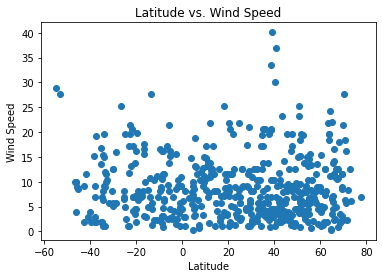

In [90]:
plt.scatter(weather["latitude"], weather["wind"])
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

In [ ]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how farth north or south it is on earth, with 0 as the equator. Its position on the y axis shows the wind speed at the time the data was pulled. We see a small group of very windy places around 40 degrees north latitude. This isn't as striking as seeing the sahara on the humidity chart, but I do think that's the trade winds. We could look at this data on different days to check if it's consistent or just random storms. 